# **CROP PREDICTION USING GRADIENT BOOST CLASSIFIER**

### Srivatsav Venkatakrishnan
### Faculty of Engineering, Environment and Computing
### MSc. Data Science and Computational Intelligence

# **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **READING DATA FILE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/m&o_Task1/indiancrop_dataset.csv")
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


# **DATA PREPROCESSING**

In [ ]:
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

In [ ]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
N_SOIL,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.001302
P_SOIL,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.023683
K_SOIL,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.021923
TEMPERATURE,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.029044
HUMIDITY,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.041414
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.033548
RAINFALL,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.058847
CROP_PRICE,-0.001302,-0.023683,-0.021923,-0.029044,-0.041414,-0.033548,0.058847,1.000000


<ipython-input-7-a72216714ba9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="crest")


<Axes: >

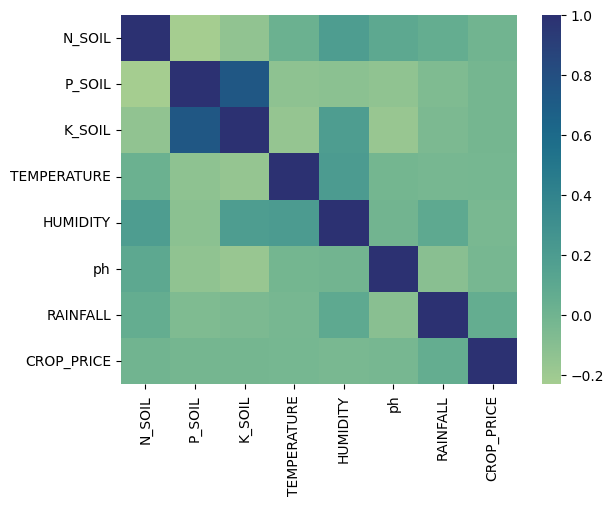

In [ ]:
sns.heatmap(df.corr(),cmap="crest")

In [ ]:
df.nunique()

N_SOIL          137
P_SOIL          117
K_SOIL           73
TEMPERATURE    2200
HUMIDITY       2200
ph             2200
RAINFALL       2200
STATE            26
CROP_PRICE      502
CROP             22
dtype: int64

In [ ]:
df.CROP.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [ ]:
df.drop(['STATE'],axis=1,inplace=True)

In [ ]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1500,Coffee


# **SKEWNESS**

In [ ]:
df.skew()

<ipython-input-12-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


N_SOIL          0.509721
P_SOIL          1.010773
K_SOIL          2.375167
TEMPERATURE     0.184933
HUMIDITY       -1.091708
ph              0.283929
RAINFALL        0.965756
CROP_PRICE     15.926745
dtype: float64

In [ ]:
df.P_SOIL=np.log(df['P_SOIL'])

In [ ]:
df.K_SOIL=np.log(df['K_SOIL'])

In [ ]:
df['HUMIDITY']=np.log(df['HUMIDITY'])

In [ ]:
iq1=df['CROP_PRICE'].quantile(0.25)
iq2=df['CROP_PRICE'].quantile(0.75)
iq1

950.0

In [ ]:
iq2

3500.0

In [ ]:
df['CROP_PRICE']=np.where(df['CROP_PRICE']<iq1,iq1,df['CROP_PRICE'])
df['CROP_PRICE']=np.where(df['CROP_PRICE']>iq2,iq2,df['CROP_PRICE'])

In [ ]:
df.skew()

<ipython-input-19-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


N_SOIL         0.509721
P_SOIL        -0.782108
K_SOIL         0.804010
TEMPERATURE    0.184933
HUMIDITY      -1.900877
ph             0.283929
RAINFALL       0.965756
CROP_PRICE     0.283069
dtype: float64

# **DATA ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['CROP']=le.fit_transform(df['CROP'])


# **DATA SPLITING**

In [ ]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
0,90,3.737670,3.761200,20.879744,4.406753,6.502985,202.935536,3500.0
1,85,4.060443,3.713572,21.770462,4.386014,7.038096,226.655537,3500.0
2,60,4.007333,3.784190,23.004459,4.410623,7.840207,263.964248,3500.0
3,74,3.555348,3.688879,26.491096,4.384004,6.980401,242.864034,3500.0
4,78,3.737670,3.737670,20.130175,4.401889,7.628473,262.717340,3500.0


In [ ]:
y.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

### Training a model

**TRAIN-TEST-SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [ ]:
print("Training data",x_train.shape)

Training data (1540, 8)


In [ ]:
print("Training data",x_test.shape)

Training data (660, 8)


# **IMPORTING ALGORITHM**


**PREDICTION OF CROP**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()


In [ ]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_prediction=model.predict(x_test)

# Alternate Method
You can also you the random forest classifier but i have chosen Gradien Boost classifier as my primary method.

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier()

In [ ]:
#model.fit(x_train,y_train)

In [ ]:
#y_prediction=model.predict(x_test)

# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Precision
precision = precision_score(y_test, y_prediction, average='weighted')
print("Precision Score:", precision)

Precision Score: 0.9956773618538324


In [ ]:
# Recall
recall = recall_score(y_test, y_prediction, average='weighted')
print("Recall Score:", recall)

Recall Score: 0.9954545454545455


In [ ]:
# F1 Score
f1 = f1_score(y_test, y_prediction, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.9954348608198675


# **MODEL METRICS**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.9954545454545455

# **MODEL DEPLOYMENT**

In [ ]:
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data=(49,4.234107,4.406719,18.315615,2.731860,7.263119,81.787105,3500.0)
input_array=np.asarray(input_data)
data_reshape=input_array.reshape(1,-1)
prediction=model.predict(data_reshape)
print(prediction)


[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
